In [58]:
%matplotlib inline

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits
import plotly.graph_objects as go
import plotly.express as px
from astrocalc import *


56


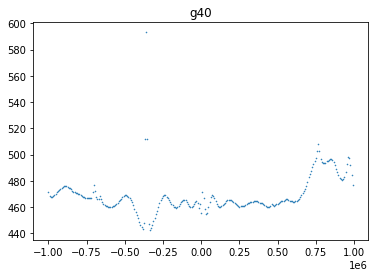

In [60]:
obj_name = 'g40'
hdul = fits.open('srt-galactic-test/'+obj_name+ '.fits')
data = hdul[0].data/len(hdul)
f_s = 2e6
n_spec = len(data)
# I'm assuming each spectrum
for i in range(1,len(hdul)):
    data = data + hdul[i].data/len(hdul)
    
freqs = np.fft.fftfreq(n_spec,1./f_s)
plt.scatter(freqs,data,s=0.3)
plt.title(obj_name)
print(len(hdul))

In [61]:
samps = np.row_stack([i.data for i in hdul])
print(samps.shape)

(56, 256)


Text(0.5, 1.0, 'g40 STI')

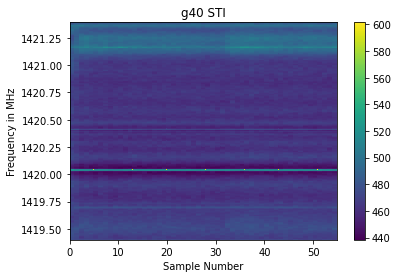

In [62]:
freq_mat,s_mat = np.meshgrid(np.fft.fftshift(freqs)*1e-6+1420.4,np.arange(len(hdul)))
plt.pcolormesh(s_mat, freq_mat, np.fft.fftshift(samps,axes=1))
plt.colorbar()
plt.ylabel('Frequency in MHz')
plt.xlabel('Sample Number')
plt.title(obj_name + " STI")


In [63]:
#calculate v_lsr
lat = 42.5 #at Haystack
lon = 71.5 #at Haystack
date = hdul[0].header['Date-OBS']
year= int(hdul[0].header['Date-OBS'].split('-')[0])
day = dayOfYear(date)
time = hdul[0].header['UTC']
hour,minute,sec = map(float,time.split(":"))
metadata = hdul[0].header['METADATA'].split(',')
for element in metadata:
    if "motor_az" in element:
        az = float(element.split(':')[-1])
    elif "motor_el" in element:
        el = float(element.split(':')[-1])
v_lsr = calc_vlsr(year,day,hour,minute,sec,az,el,lat,lon)

In [64]:
freqs = np.fft.fftshift(freqs)*1e-6+1420.4
lightspeed = 299792
velocities = [((1420.4-f)/1420.4)*lightspeed - v_lsr for f in freqs]
print(len(freqs),len(data),len(velocities))
df = {'value':data,'frequency':freqs, 'velocity':velocities}
fig = px.scatter(df, x="v",y="value",hover_data=["freq"])
fig.show()

[1419.4       1419.4078125 1419.415625  1419.4234375 1419.43125
 1419.4390625 1419.446875  1419.4546875 1419.4625    1419.4703125]
256 256 256
